In [ ]:
import os

import numpy as np

import pandas as pd
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  

%matplotlib inline

In [ ]:
data_frame = pd.read_csv('Advertising.csv')
data_frame.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[0])
    sigma = np.zeros(X.shape[0])
    mu = np.mean(X)
    sigma = np.std(X)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [ ]:
data_frame.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


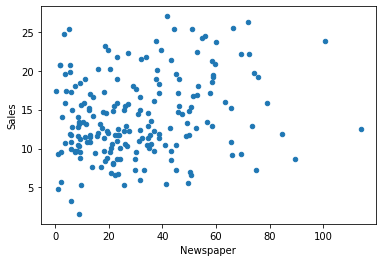

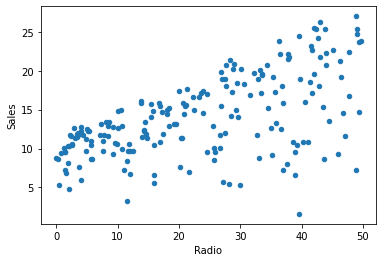

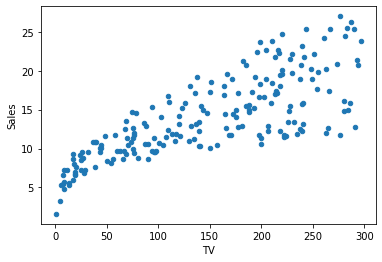

In [ ]:

data_frame.plot(kind="scatter", x='Newspaper', y='Sales')
data_frame.plot(kind="scatter", x='Radio', y='Sales')
data_frame.plot(kind="scatter", x='TV', y='Sales')

In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data_frame, test_size=0.15, shuffle=False)

train_data = train.reset_index(drop=True)
test_data = test.reset_index(drop=True)

In [ ]:
X = np.array(train_data['TV'])
y = np.array(train_data['Sales'])
print(X.shape,y.shape)
m = y.size
print(X.size,m)
X = np.stack([np.ones(m), X], axis=1)
print(X.shape)

(170,) (170,)
170 170
(170, 2)


In [ ]:
def computeCost(X, y, theta):
    m = y.size  
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]  
    theta = theta.copy()
    J_history = [] 
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

In [ ]:
theta = np.zeros(2)
iterations = 550000
alpha = 0.000068
theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: 7.1972, 0.0474


In [ ]:
def plotData(x, y):

    fig = pyplot.figure()  
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Sales')
    pyplot.xlabel('TV')



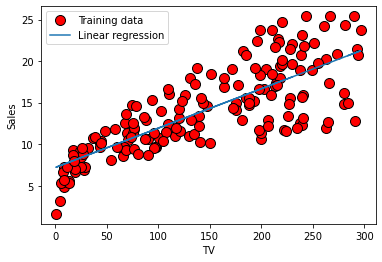

In [ ]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);

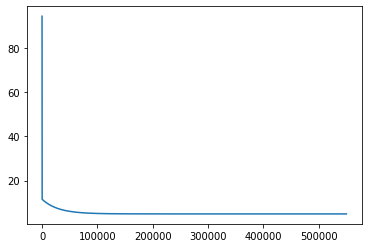

In [ ]:
import matplotlib.pyplot as plt
plt.plot(J_history)

In [ ]:
def predict(X_test,theta):
  y_pred = np.dot(X_test,theta)
  return y_pred


In [ ]:
X_test = np.array(test_data['TV'])
y_test = np.array(test_data['Sales'])
m1 = y_test.size
X_test = np.stack([np.ones(m1), X_test], axis=1)
y_pred=predict(X_test,theta)
p=np.sum((y_pred-y_test)**2)
mu = np.mean(y_test)
q=np.sum((y_test-mu)**2)
print("The R-squared for the model is",(1-(p/q))*100)
p=np.sum((y_pred-y_test)**2)/m1
print("The root mean squared error for the model is",np.sqrt(p))


The R-squared for the model is 55.9372155769255
The root mean squared error for the model is 3.8183520452058537
